
## 👋🏽 What's up! It's Nazih

I'll be guiding you through this notebook. At any point, if you get stuck or have questions, there are three ways to get in touch:

1) Send me an email with your issue: naziherrahel@gmail.com

2) approach me after the class, and let me know what your question is.

3) or by texting me in telegram @naziher ✅


Let's get to it...




#Instaling our neccesary libraries and cloning our needed github reposotories ⚓

---



In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_zip(zip_file_path, destination_dir):
    """
    Extract a zip file to a specified destination directory.

    :param zip_file_path: Path to the zip file you want to extract.
    :param destination_dir: Destination directory where you want to extract the files.
    """
    # Create the destination directory if it doesn't exist
    os.makedirs(destination_dir, exist_ok=True)

    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)

    # List the contents of the extracted directory
    extracted_files = os.listdir(destination_dir)
    print("Extracted files:", extracted_files)


In [ ]:
# extracting the zip file of our mean dataset
# https://universe.roboflow.com/madhuben-and-bhanubhai-patel-institute-of-technology/vest-va3tc/dataset/1
zip_file_path = '/content/drive/MyDrive/datasets/vest.v1i.yolov8.zip'
destination_directory = '/content/Dataset_imbalanced'

extract_zip(zip_file_path, destination_directory)


Extracted files: ['README.roboflow.txt', 'test', 'train', 'README.dataset.txt', 'data.yaml', 'valid']


In [ ]:
# extracting the zip file of a dataset contains vest images
# https://universe.roboflow.com/work-safe-project/safety-vest---v4

zip_file_path = '/content/drive/MyDrive/datasets/Safety vest - v4.v3i.yolov8.zip'
destination_directory = '/content/dataset_for_balancing'

extract_zip(zip_file_path, destination_directory)


Extracted files: ['README.roboflow.txt', 'test', 'train', 'README.dataset.txt', 'data.yaml', 'valid']


## be one with the data

In [ ]:
# ploting the classes accurence in the data using the classes indexes

def count_class_occurrences_txt(annotation_dirs, classes):
    class_counts = defaultdict(int)

    # Iterate through the annotation directories
    for annotation_dir in annotation_dirs:
        # Iterate through the text annotation files in the specified directory
        for filename in os.listdir(annotation_dir):
            if filename.endswith('.txt'):
                txt_path = os.path.join(annotation_dir, filename)

                # Read the lines from the text file
                with open(txt_path, 'r') as file:
                    lines = file.readlines()

                # Extract class IDs from each line and map them to class names
                for line in lines:
                    parts = line.strip().split()
                    if parts:  # Ensure the line is not empty
                        class_id = int(parts[0])
                        if 0 <= class_id < len(classes):
                            class_name = classes[class_id]
                            class_counts[class_name] += 1

    return dict(class_counts)


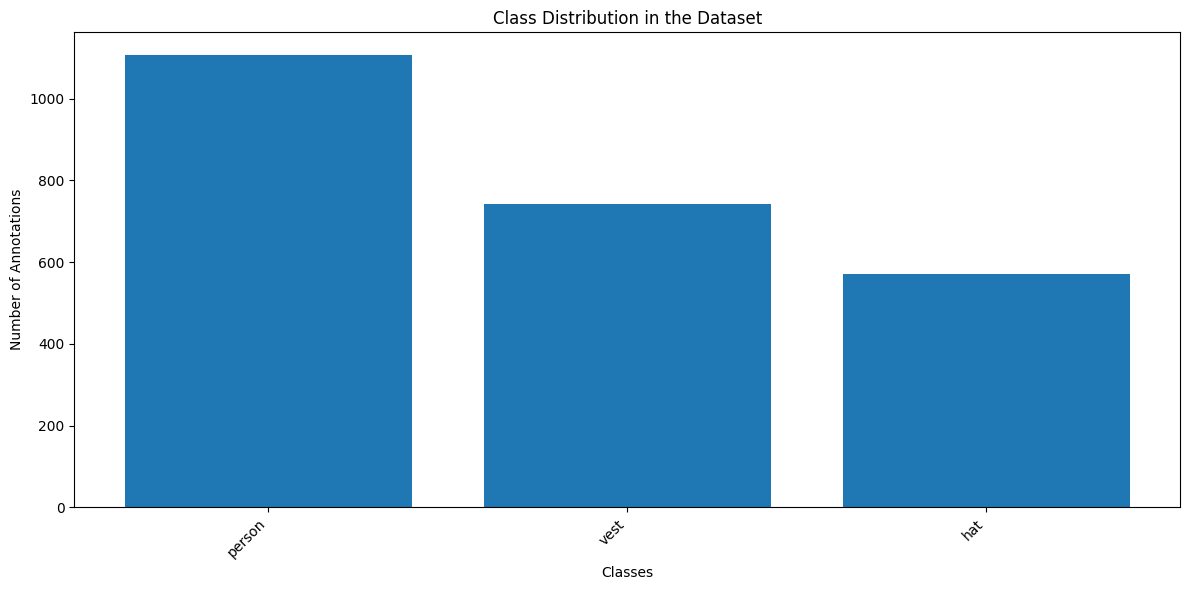

In [ ]:
annotation_directories =  ['/content/Dataset/train/labels']


class_list = ['hat', 'person', 'vest']



class_occurrences_train = count_class_occurrences_txt(annotation_directories, class_list)

# Create a bar plot to visualize class occurrences
plt.figure(figsize=(12, 6))
plt.bar(class_occurrences_train.keys(), class_occurrences_train.values())
plt.xlabel('Classes')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_occurrences_train

{'person': 1107, 'vest': 743, 'hat': 572}

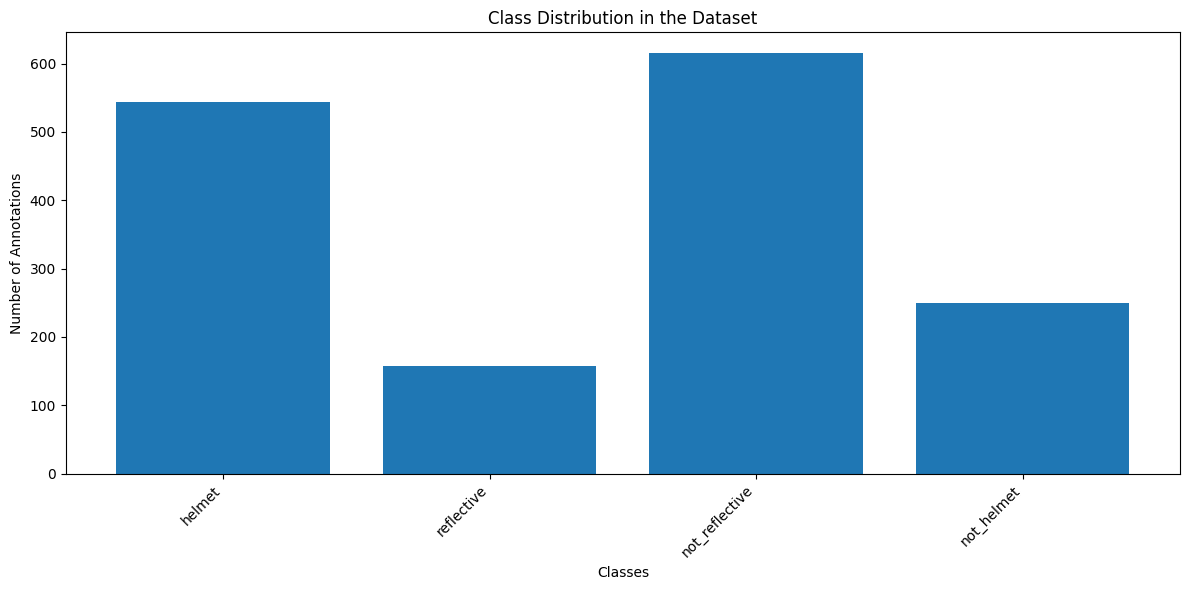

In [ ]:
annotation_directories =  ['/content/dataset_for_balancing/train/labels']


class_list = ['helmet', 'not_helmet', 'not_reflective', 'reflective']



class_occurrences_train1 = count_class_occurrences_txt(annotation_directories, class_list)

# Create a bar plot to visualize class occurrences
plt.figure(figsize=(12, 6))
plt.bar(class_occurrences_train1.keys(), class_occurrences_train1.values())
plt.xlabel('Classes')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_occurrences_train1

{'helmet': 544, 'reflective': 158, 'not_reflective': 615, 'not_helmet': 250}

In [ ]:
mean_classes= ['hat', 'person', 'vest']
classes_balance = ['helmet', 'not_helmet', 'not_reflective', 'reflective']
# Define the path to your dataset folders
dataset_folders = ['/content/dataset_for_balancing/test/labels', '/content/dataset_for_balancing/train/labels', '/content/dataset_for_balancing/valid/labels']

excluded_classes = [1,2]

# Function to modify an annotation file
def modify_annotation_file(input_file):
    with open(input_file, "r") as infile:
        lines = infile.readlines()

    with open(input_file, "w") as outfile:
        for line in lines:
            parts = line.strip().split()
            class_index = int(parts[0])

            # Check if the class index is not in the exclusion list
            if class_index not in excluded_classes:
                outfile.write(line)

# Process annotation files in each dataset folder
for folder in dataset_folders:
    # List annotation files in the folder
    annotation_files = [f for f in os.listdir(folder) if f.endswith(".txt")]

    # Process each annotation file
    for annotation_file in annotation_files:
        input_path = os.path.join(folder, annotation_file)
        modify_annotation_file(input_path)


In [ ]:
mean_classes= ['hat', 'person', 'vest']
classes_balance = ['helmet', 'not_helmet', 'not_reflective', 'reflective']
new_class=["hat", "person", "vest"]

# Define a class mapping dictionary for old class IDs to new class IDs
class_mapping = {
    3:2

}

# List of directories containing label files
label_dirs = ['/content/dataset_for_balancing/test/labels', '/content/dataset_for_balancing/train/labels', '/content/dataset_for_balancing/valid/labels']

# Iterate through each directory
for label_dir in label_dirs:
    # Iterate through label files and update class IDs
    for filename in os.listdir(label_dir):
        if filename.endswith('.txt'):
            file_path = os.path.join(label_dir, filename)
            updated_lines = []
            with open(file_path, 'r') as label_file:
                for line in label_file:
                    parts = line.strip().split()
                    if len(parts) >= 1:
                        old_class_id = int(parts[0])
                        new_class_id = class_mapping.get(old_class_id, old_class_id)
                        parts[0] = str(new_class_id)
                        updated_line = ' '.join(parts)
                        updated_lines.append(updated_line)

            # Write the updated lines back to the label file
            with open(file_path, 'w') as label_file:
                for updated_line in updated_lines:
                    label_file.write(updated_line + '\n')


##copying the test train validation directories for the images to the main dataset

In [ ]:
def copy_files(source_dir, destination_dir):
    """
    Copy files from the source directory to the destination directory.

    :param source_dir: Source directory containing files you want to copy.
    :param destination_dir: Destination directory where you want to copy the files.
    """
    # Ensure the destination directory exists
    os.makedirs(destination_dir, exist_ok=True)

    # Copy each file from source to destination
    for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)
        shutil.copy(source_file, destination_file)

    print("All files copied successfully.")



In [ ]:

# test

source_directory = '/content/dataset_for_balancing/test/images'
destination_directory = '/content/Dataset/test/images'


copy_files(source_directory, destination_directory)

# train

source_directory = '/content/dataset_for_balancing/train/images'
destination_directory = '/content/Dataset/train/images'

copy_files(source_directory, destination_directory)

# validation

source_directory = '/content/dataset_for_balancing/valid/images'
destination_directory = '/content/Dataset/valid/images'

copy_files(source_directory, destination_directory)




All files copied successfully.
All files copied successfully.
All files copied successfully.


In [ ]:
# test

source_directory = '/content/dataset_for_balancing/test/labels'
destination_directory = '/content/Dataset/test/labels'

copy_files(source_directory, destination_directory)

# train

source_directory = '/content/dataset_for_balancing/train/labels'
destination_directory = '/content/Dataset/train/labels'

copy_files(source_directory, destination_directory)

# valid
source_directory = '/content/dataset_for_balancing/valid/labels'
destination_directory = '/content/Dataset/valid/labels'

copy_files(source_directory, destination_directory)


All files copied successfully.
All files copied successfully.
All files copied successfully.


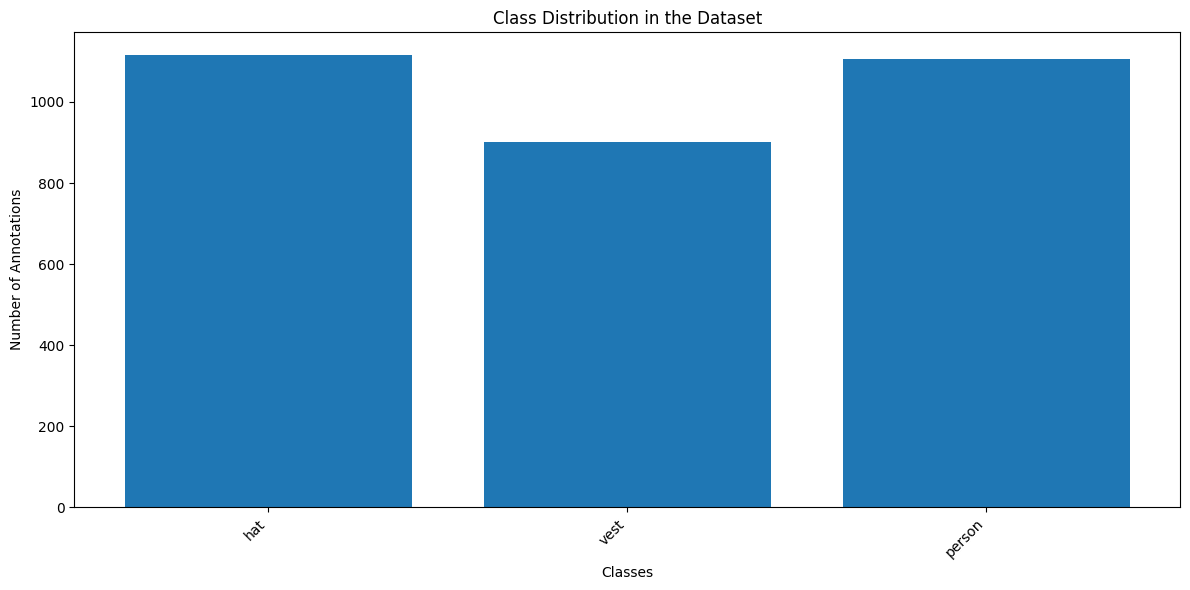

In [ ]:
annotation_directories =  ['/content/Dataset/train/labels']


class_list = ['hat', 'person', 'vest']



class_train_balance = count_class_occurrences_txt(annotation_directories, class_list)

# Create a bar plot to visualize class occurrences
plt.figure(figsize=(12, 6))
plt.bar(class_train_balance.keys(), class_train_balance.values())
plt.xlabel('Classes')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_occurrences_train

{'person': 1107, 'vest': 743, 'hat': 572}

In [ ]:
class_train_balance

{'hat': 1116, 'vest': 901, 'person': 1107}

##Data augmentation

[albumentation ](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)

In [ ]:
import cv2
import os
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
# Define input and output directories, no need to change these 4 paths ;)

input_image_dir = '/content/Dataset/train/images'
input_label_dir = '/content/Dataset/train/labels'
output_image_dir = '/content/Dataset/train/images'
output_label_dir = '/content/Dataset/train/labels'



# List of available augmentation transforms
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Blur(p=0.2),
    A.ShiftScaleRotate(p=0.5, shift_limit=0.2, scale_limit=0.2, rotate_limit=30),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Get a list of image files in the input directory
image_files = [f for f in os.listdir(input_image_dir) if f.endswith('.jpg')]

# Process each image and its bounding boxes along with labels
for image_file in image_files:
    image_path = os.path.join(input_image_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image_name, ext = os.path.splitext(image_file)

    # Load the bounding box annotations
    annotation_file = os.path.join(input_label_dir, image_name + '.txt')
    annotations = []
    class_labels = []  # Store class labels separately
    with open(annotation_file, 'r') as file:
        for line in file:
            parts = list(map(float, line.strip().split()))
            class_id = int(parts[0])
            class_labels.append(class_id)
            bbox = parts[1:]
            annotations.append(bbox)

    augmented = augmentations(image=image, bboxes=annotations, class_labels=class_labels)
    augmented_image = augmented['image']

    # Generate a new file name for the augmented image and labels
    new_image_file = f"{image_name}_augmented{ext}"
    new_annotation_file = f"{image_name}_augmented.txt"

    # Convert the augmented image to a NumPy array
    augmented_image_np = augmented_image.permute(1, 2, 0).cpu().numpy()

    # Save the augmented image and its bounding box annotations with new names
    output_image_path = os.path.join(output_image_dir, new_image_file)
    cv2.imwrite(output_image_path, augmented_image_np)

    output_annotation_file = os.path.join(output_label_dir, new_annotation_file)
    with open(output_annotation_file, 'w') as file:
        for class_id, bbox in zip(class_labels, augmented['bboxes']):
            file.write(f"{class_id} {' '.join(map(str, bbox))}\n")

print(f"A total of {len(image_files)} images and their bounding box annotations were augmented and saved with new file names.")


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


A total of 1421 images and their bounding box annotations were augmented and saved with new file names.


---
📈 **And here we will check our Data Augmentation results** 🔥
---



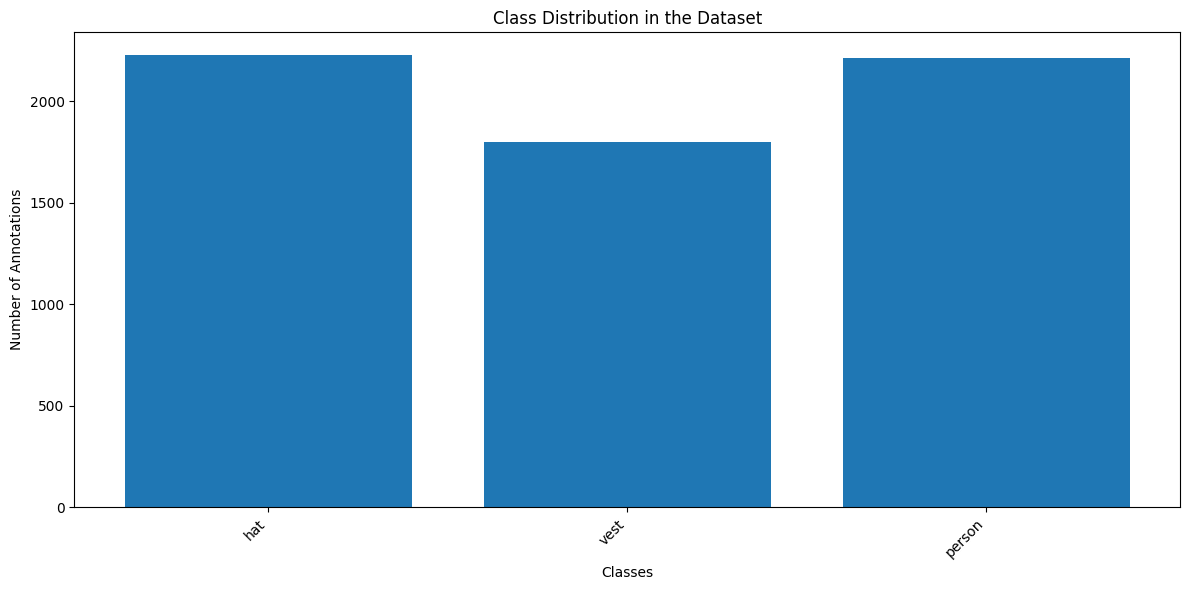

In [ ]:
#here we should define our train set path where we applyied augmentation, no need to change it since you will have the same path ;)
annotation_directories =  ['/content/Dataset/train/labels']

# here you should use your own classes list as i explained before
class_list = ['hat', 'person', 'vest']



class_train = count_class_occurrences_txt(annotation_directories, class_list)

# Create a bar plot to visualize class occurrences
plt.figure(figsize=(12, 6))
plt.bar(class_train.keys(), class_train.values())
plt.xlabel('Classes')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_occurrences_train

{'person': 1107, 'vest': 743, 'hat': 572}

In [ ]:
class_train_balance

{'hat': 1116, 'vest': 901, 'person': 1107}

In [ ]:
class_train

{'hat': 2229, 'vest': 1802, 'person': 2214}

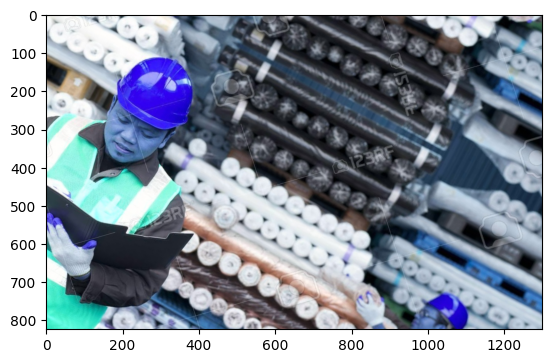

In [ ]:
from PIL import Image
# here you should replace this path with one of the images path in the training set .
img = plt.imread('/content/Dataset/train/images/00252_jpg.rf.3b90c4fadfee0974615000c15011d79e_augmented.jpg')
plt.imshow(img)


In [ ]:
# Replace 'source_directory' with the path of our dataset
source_directory = '/content/Dataset'

# Replace 'output_filename' with the desired name for the ZIP file
output_filename = 'ppe_dataset_aug.zip'

# Create a ZIP archive of the source directory
shutil.make_archive(output_filename.split('.')[0], 'zip', source_directory)

# Provide a download link for the ZIP file
from google.colab import files
files.download(output_filename)
